# Sentiment Analysis with Deep Learning

# Phase 1- Pre-Prosessing-EDA

This notebook consists the functions and code for loading, pre=processing and EDA for this project.  

### CHRISP-DM phases

Data Understanding and Data Preperation phases for CRISP-DM can be found in this noteboook.

#### 2.Data Understanding
Starts with an initial data collection and proceeds with activities in order to get familiar with the data, to identify data quality problems, to discover first insights into the data. 

#### 3.Data Preparation
The data preparation phase covers all activities to construct the final dataset from the initial raw data.

### Table of Contents

- 1.Import Libraries
- 2.Define Functions 
- 3.Load-Read-Extract
- 4.Pre-Processig
- 5.Tokenizing-Sequenzing-Padding
- 6.Exploratory Data Analysis (EDA)


## 1. Import Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import bz2
import re
import numpy as np
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')
import nltk
from sklearn.preprocessing import LabelEncoder
np.random.seed(0)
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
import pickle
from nltk.stem import WordNetLemmatizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline
import nltk
#nltk.download('wordnet')

## 2. Functions 

In this part all functions are defined for loading, pre-processing-EDA

In [ ]:
def read_txt_file (file):
    df=pd.DataFrame()
    #create pattern for extracting labels from the comment lines
    pattern = "__label__(\d+)"
    p = re.compile(pattern)
    labels=[int(p.findall(comment)[0]) for comment in file ]
    com=[comment.split(" ",1)[1] for comment in file]
    df['comment']=com
    df['label']=labels
    return df
## Preprocessing the comment text

def punctuationRemover(p):
    '''
    Input: Takes a string. You may have to use str() to force it. 
    Removes all punctuation by checking every single character.
    Output: Returns a string.
    '''
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~1234567890''' 
    no_punctuations = ''

    for words in p: # You may not have to loop this high
        for char in words:
            if char in punctuations:
                no_punctuations = no_punctuations + ' '
            if char not in punctuations:
                no_punctuations = no_punctuations + char    
    return(no_punctuations)

def no_stopword (p):
    token= ' '.join([word.lower() for word in p.split() if word.lower not in (stop)])
    return token

def removeStopWords(str):
    #select english stopwords
    cachedStopWords = set(stopwords.words("english"))
    #add custom words
    cachedStopWords.update(('arnt','this','when','cant','these'))
    #remove stop words
    new_str = ' '.join([word.lower() for word in str if word.lower() not in cachedStopWords]) 
    return new_str



def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


def wordfreq(comments):
    wordfreq={}
    for i in comments:
        tokens = nltk.word_tokenize(i)
        for token in tokens:
            if token not in wordfreq.keys():
                wordfreq[token] = 1
            else:
                wordfreq[token] += 1  
    return wordfreq

def sorted_wordfreq (dictionary):
    df=pd.DataFrame(columns=['key', 'values'])
    df.key=dictionary.keys()
    df.values = list(dictionary.values())
    df=df.sort_values(by=['values'], ascending=False)
    df=df.reset_index(drop=True)
    return  df

def mostcommon (dic, n):
    df=sorted_wordfreq (dic)
    return list(df.iloc[:n])

In [ ]:

def label_split (train, test):
    X_train=train.comment
    X_test=test.comment
    y_train=train.label
    y_test=test.label
    return (X_train, X_test, y_train, y_test)

def sequence_padding (X_train, X_test):
    # turning the tokenized text into sequences
    X_train = tokenizer.texts_to_sequences(X_train)
    X_test  = tokenizer.texts_to_sequences(X_test)

    # padding the sequences
    X_train = sequence.pad_sequences(X_train, maxlen=128)
    X_test  = sequence.pad_sequences(X_test,  maxlen=128)

    print('X_train shape:', X_train.shape)
    print('X_test shape: ', X_test.shape)
    return (X_train, X_test)


def save_tokens (train, test):
    "save preprocessed datasets contains all tokens"
    pickle_out = open("data/tokens/train_file.pickle","wb")
    pickle.dump(train, pickle_out)
    pickle_out.close()

    pickle_out = open("data/tokens/test_file.pickle","wb")
    pickle.dump(test, pickle_out)
    pickle_out.close()

def load_tokens():
    "load token sets using pickle"
    pickle_in = open("data/tokens/train_file.pickle","rb")
    train = pickle.load(pickle_in)

    pickle_in = open("data/tokens/test_file.pickle","rb")
    test = pickle.load(pickle_in)
    return (train, test)


### Saving processed data and tokens
def save_small_vectors(X_train2, X_test2, y_train2, y_test2):
    pickle_out = open("data/vectors_small/X_train2_file.pickle","wb")
    pickle.dump(X_train2, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_small/X_test2_file.pickle","wb")
    pickle.dump(X_test2, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_small/y_train2_file.pickle","wb")
    pickle.dump(y_train2, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_small/y_test2_file.pickle","wb")
    pickle.dump(y_test2, pickle_out)
    pickle_out.close()
    

def save_full_vectors(X_train, X_test, y_train, y_test):
    pickle_out = open("data/vectors_full/X_train_file.pickle","wb")
    pickle.dump(X_train, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_full/X_test_file.pickle","wb")
    pickle.dump(X_test, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_full/y_train_file.pickle","wb")
    pickle.dump(y_train, pickle_out)
    pickle_out.close()

    pickle_out = open("data/vectors_full/y_test_file.pickle","wb")
    pickle.dump(y_test, pickle_out)
    pickle_out.close()    
    
def save_tokenizer ():
    # use pickle to save tokenizer
    with open('tokenizer.pickle', 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

def load_tokenizer():
    with open('tokenizer.pickle', 'rb') as handle:
        tokenizer=pickle.load(handle)
    return tokenizer

## 3. Load-Read-Extract

In [ ]:
#Loading text files
train_file = bz2.BZ2File('amazonreviews/train.ft.txt.bz2')
test_file = bz2.BZ2File('amazonreviews/test.ft.txt.bz2')

In [ ]:
#reading files line by line, turn them in to lists of reviews
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()

train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

#extract comments and labels by using reg-ex patter in read_text_file function
test=read_txt_file(test_file_lines)
train=read_txt_file(train_file_lines)

## 4. Pre-Processing

In [ ]:
test.shape

In [ ]:
train.shape

In [ ]:
train.isna().sum()

In [ ]:
test.isna().sum()

In [ ]:
# convert labels in to 0,1 with encoder
encoder=LabelEncoder()
train.label=encoder.fit_transform(train.label)
test.label=encoder.fit_transform (test.label)

save_tokens (train, test) 

#remove stop words, punctuations and number from comments
train.comment=[punctuationRemover(p) for p in train.comment]
test.comment=[punctuationRemover(p) for p in test.comment]
save_tokens (train, test) 

I have triad to process train data as a whole but, my laptop cpu could not handle. So I decided to split it into two pices and process that way. I have splitted data by their labels. This way my laptop could handle the process. 

In [23]:
#get smaller train data. train data is too big to process by itself. 
pos=train[train.label==1]
neg=train[train.label==0]

In [ ]:
#processing train data in two pices
pos.comment=[nltk.word_tokenize(words) for words in pos.comment]
neg.comment=[nltk.word_tokenize(words) for words in neg.comment]

In [ ]:
#train,test=load_tokens() 
test.comment=[nltk.word_tokenize(words) for words in test.comment]
#train.comment=[nltk.word_tokenize(words) for words in train.comment]

In [ ]:
#save pos dataframe
pickle_out = open("data/neg.pickle","wb")
pickle.dump(neg, pickle_out)
pickle_out.close()

In [ ]:
#save neg dataframe
pickle_out = open("data/test","wb")
pickle.dump(pos, pickle_out)
pickle_out.close()

In [ ]:
#remove stop words, punctuations and number from comments
#train.comment=[removeStopWords(p) for p in train.comment]
test.comment=[removeStopWords(p) for p in test.comment]
pos.comment=[removeStopWords(p) for p in pos.comment]
neg.comment=[removeStopWords(p) for p in neg.comment]

In [ ]:
#lemmetize the words to get more generalized list
#train.comment=[lemmatize_verbs(p) for p in train.comment]
test.comment=[lemmatize_verbs(p) for p in test.comment]
pos.comment=[lemmatize_verbs(p) for p in pos.comment]
neg.comment=[lemmatize_verbs(p) for p in neg.comment]

Lets combine the pre-processed train data back to one piece and save.

In [ ]:
#combine pos and neg dataframes into train dataset
train=pd.concat([pos, neg])
train = train.sample(frac=1).reset_index(drop=True)

In [ ]:
#use pickle to save pre-processed data for later use 
save_tokens (train, test) 

## 5. Vectorizing-Sequenzing-Padding
### Fit tokenizer to full trainset

We need one tokenizer.Keras' Tokenizer() class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf. By default, all punctuation is removed, turning the texts into space-separated sequences of words. Since we already did those above, it won't be too long. These sequences are then split into lists of tokens. They will then be or vectorized.

In [14]:
#load preprocessed data
train, test=load_tokens()

In [ ]:
# tokenizing the data
tokenizer = Tokenizer(num_words=8192)
# fit tokenizer to train data
tokenizer.fit_on_texts(list(train.comment))

In [ ]:
save_tokenizer ()

In [ ]:
tokenizer=load_tokenizer()  


### Squenzing and padding full dataset
Before sequenzing, lest split the data into data and labels. Then do sequencing and padding. Sequenzing converts a text to a sequence of words (or tokens) and padding makes their size even. 

In [ ]:
#split label and comment columns in the data
X_train, X_test, y_train, y_test = label_split(train, test)

# turning the tokenized text into sequences and padding the sequences
X_train, X_test = sequence_padding (X_train, X_test)

In [ ]:
#Saving Tokenized data with Pickle
save_full_vectors (X_train, X_test, y_train, y_test)

### Sequenzing and padding  partial dataset

The full dataset has 4 millions of comments. It is too big for modeling. Since it willbe too many trial and error sessions, I will use small sample to figure the best model. After deciding the best one, I will pass the whole train and test data to the final model. 

In [19]:
import random
train2=train.sample(n=150000, random_state=1)
train2=train2.reset_index()
test2=test.sample(n=30000, random_state=1)
test2=test2.reset_index()

In [20]:
#split label and comment columns in the data
X_train2, X_test2, y_train2, y_test2 = label_split(train2, test2)




In [21]:
X_train2

0         shame plain vanilla edition wonderful holy boo...
1         turning richard raffin three volume work well ...
2         outstanding head wear tilley hats bit pricey d...
3         happy connecticut litter robot couple years ca...
4         good weapons cars stuff game short um beat gam...
                                ...                        
149995    total dissapointment bought bag big interview ...
149996    v severn md love close home sort speak kept in...
149997    horrible look cleaning reviewers noted using c...
149998    card kicks card upgrade ati raedon mb card han...
149999    expired movie rental time expired could watch ...
Name: comment, Length: 150000, dtype: object

In [22]:
# turning the tokenized text into sequences and padding the sequences
X_train2, X_test2 = sequence_padding (X_train2, X_test2)

#Saving Tokenized data with Pickle
save_small_vectors(X_train2, X_test2, y_train2, y_test2)

X_train shape: (150000, 128)
X_test shape:  (30000, 128)


## 6. Exploratory Data Analysis (EDA)

### Label distribution
Label distribution is important when it comes to the performence of a model. Unbalanced labels might be a negative effect. Lets check how is ours:

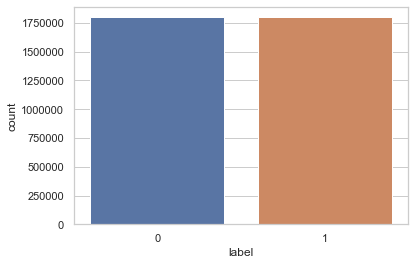

In [24]:
sns.set(style="whitegrid")
ax = sns.countplot(x="label", data=train)


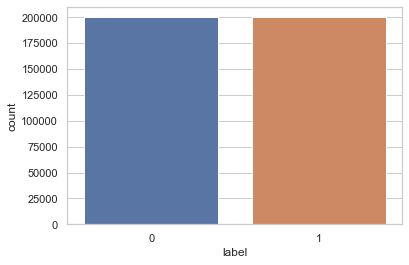

In [25]:
ax = sns.countplot(x="label", data=test)

Labels are perfectly distributed. This is a great condition for model's performence

## Word Frequency

Lets explore how the word distribution on negative and positive comments. 

In [26]:
#create a frequency list and sort them , then return most frequest n words.
wordfreq1=wordfreq(pos.comment)   
mostcommon(wordfreq1, 50)

['key', 'values']

In [27]:
wordfreq2=wordfreq(neg.comment)   
mostcommon(wordfreq2, 50)

['key', 'values']

In [28]:
pos30=sorted_wordfreq(wordfreq1).iloc[:30]
neg30=sorted_wordfreq(wordfreq2).iloc[:30]

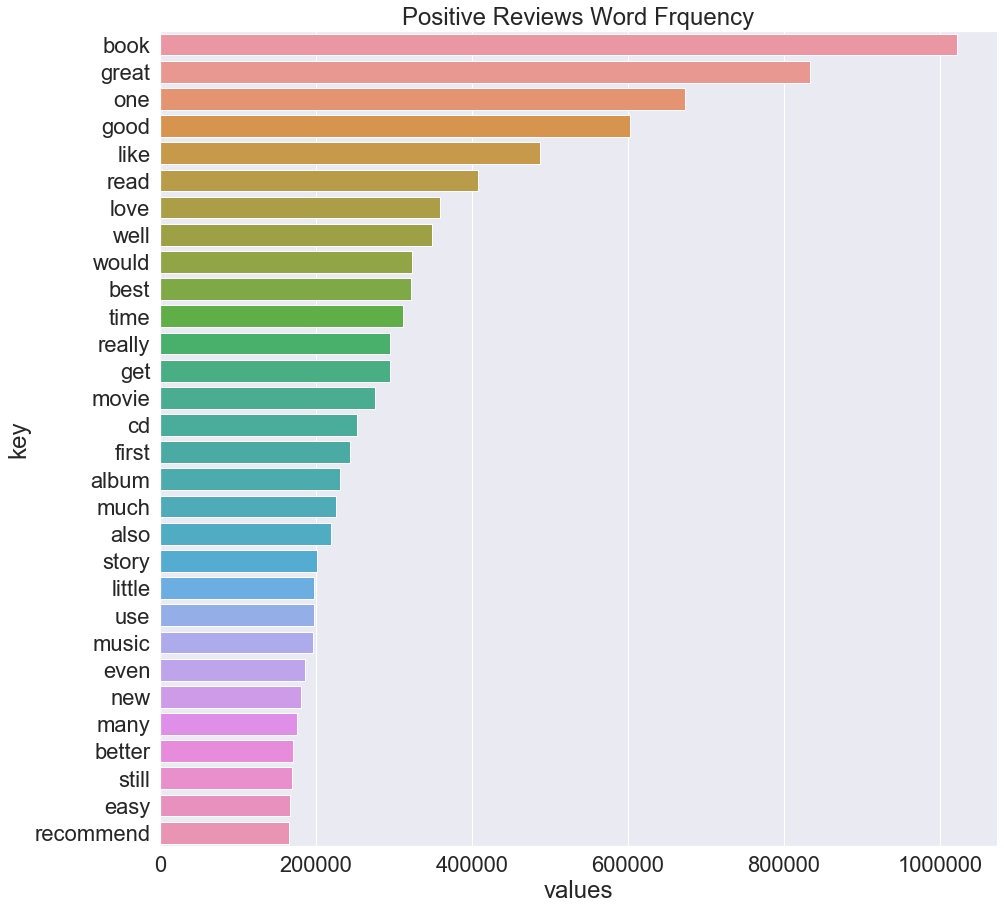

In [29]:
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
plt.title('Positive Reviews Word Frquency')
sns.barplot("values","key", data=pos30)

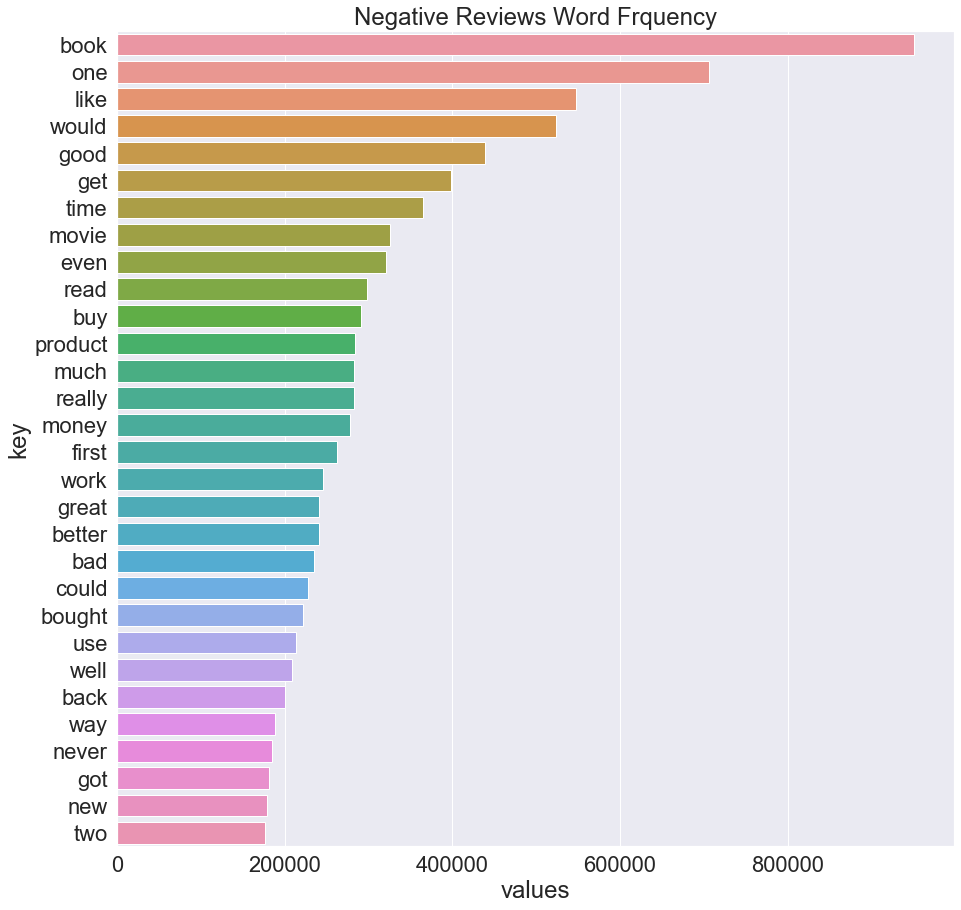

In [30]:
sns.set(font_scale=2)
plt.figure(figsize=(15,15))
plt.title('Negative Reviews Word Frquency')
sns.barplot("values","key", data=neg30)

It is hard to tell the difference between the lists when comparing the distributions. While there are some significant words for each label, many words are common and frequently used for both classes.

## Comment Size Comparison

Lets check if there is any difference between the average length of comments of each label.

In [31]:
pos['length']=[len(comment.split()) for comment in pos.comment]
neg['length']=[len(comment.split()) for comment in neg.comment]

/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kaan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
avg_pos=np.mean(pos['length'])
avg_neg=np.mean(neg['length'])
print([avg_pos,avg_neg])

[38.691901111111115, 40.678889444444444]


Text(0.5, 1.0, 'Comment Lenght Chart')

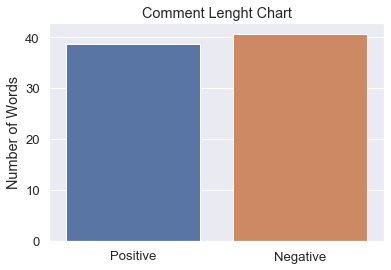

In [33]:
sns.set(font_scale=1.2)
sns.barplot(['Positive', 'Negative'], [avg_pos, avg_neg])
plt.ylabel('Number of Words')
plt.title('Comment Lenght Chart')


Negative comments are two words longer than the positive ones in average. This might not be a significant difference. 